In [1]:
# Librerias

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, MeanShift, estimate_bandwidth

In [2]:
# Cargar la imagen
target = 'img1.jpg'#'palette3.png'#'Ermine.jpg' #
img_original = cv2.cvtColor(cv2.imread(target), cv2.COLOR_BGR2RGB)

 las dimensiones de la variable que se le entrega al algoritmo son: (95040, 3)


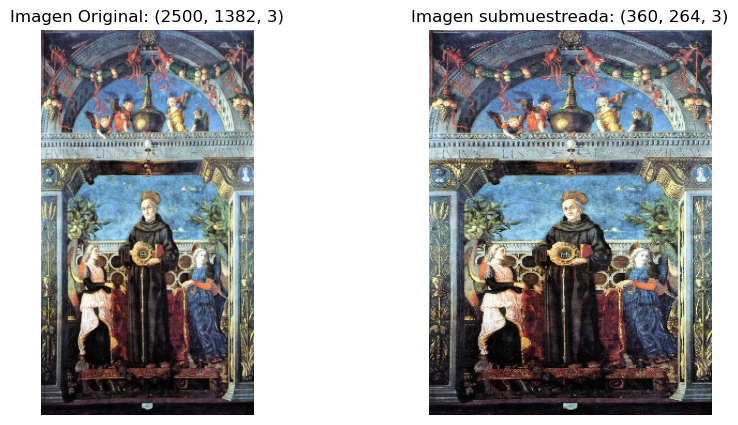

In [3]:
# Pre-procesamiento de la imagen:  

# submuestreo para ahorrar recursos computacionales
nuevo_ancho = 88*3
nuevo_alto = 120*3
nuevo_tamanio = (nuevo_ancho, nuevo_alto)

img_submuestreada = cv2.resize(img_original, nuevo_tamanio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {img_original.shape}')
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f'Imagen submuestreada: {img_submuestreada.shape}')
plt.imshow(img_submuestreada)
plt.axis('off')

# Transformar al espacio de color CIELAB
img_transformada = img_submuestreada#cv2.cvtColor(img_submuestreada, cv2.COLOR_RGB2LAB)

# Darle formato a la imagen
img_final = img_transformada.reshape((-1, 3))/255 # No hay que escalar por que se está haciendo aqui teniendo en cuenta el rango definido de RGB
(total_pixels,n) = img_final.shape
print(f' las dimensiones de la variable que se le entrega al algoritmo son: {total_pixels,n}')

In [33]:
bandwidth = estimate_bandwidth(img_final, quantile=0.03, n_samples=100)

In [35]:
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all = False)
meanshift.fit(img_final)

MeanShift(bandwidth=0.04369378170155893, bin_seeding=True, cluster_all=False)

In [37]:
labels = meanshift.labels_
colors = meanshift.cluster_centers_

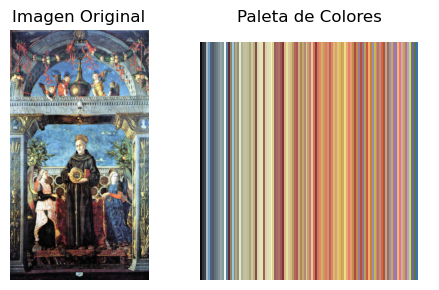

In [39]:
# Mostrar la imagen original junto con su paleta de colores
fig, ax = plt.subplots(1,2,figsize=(5, 3))  

ax[0].imshow(img_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')
# crear la paleta
for i, color in enumerate(colors):
    ax[1].bar(i, height=1, color=color, edgecolor='none', width=1)

ax[1].set_title('Paleta de Colores')
ax[1].axis('off')
plt.tight_layout()
plt.show()